In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

file_detached = "detached_apex.csv"

homes_data = pd.read_csv(file_detached)

In [2]:
homes_data.count()

MLS #                    5114
Status                   5114
Address                  5114
City                     5114
Zip                      5114
Closing Date             5114
Subdivision              5114
LvngAreaSF               5114
YrBlt                    5114
Beds                     5114
FBths                    5114
HBths                    5114
Property Type            5114
List Price               5114
Sold Price               5114
Days On Market           5114
HOA Y/N                  4571
Garage                   5114
Acres                    5114
Sold Price/List Price    5114
dtype: int64

In [3]:
homes_df = homes_data.copy()
homes_df = homes_df.rename(columns={"Sold Price": "SoldPrice"})
homes_df = homes_df.rename(columns={"List Price": "ListPrice"})

#remove $
homes_df['SoldPrice'] = homes_df.SoldPrice.str.lstrip('$')
homes_df['ListPrice'] = homes_df.ListPrice.str.lstrip('$')
#remove comma
homes_df['SoldPrice'] = homes_df['SoldPrice'].str.replace(',', '').astype(float)
homes_df['ListPrice'] = homes_df['ListPrice'].str.replace(',', '').astype(float)
homes_df['LvngAreaSF'] = homes_df['LvngAreaSF'].str.replace(',', '').astype(int)


,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2307699,CLOSED,472 NC 751 Highway,Apex,27523,9/28/2020,Not in a Subdivision,1480,1989,2,2,0,Detached,150000.0,1.0,111,NaN,0,1-2.9 Acres,0.00
1,2198042,CLOSED,5520 Bobbitt Road,Apex,27539,8/29/2018,Not in a Subdivision,640,1962,2,0,0,Detached,59000.0,59000.0,62,NaN,0,0-.25 Acres,1.00
2,2177583,CLOSED,5524 Bobbitt Road,Apex,27539,5/9/2018,Not in a Subdivision,1083,1953,2,1,0,Detached,75000.0,92000.0,2,No,0,.51-.75 Acres,1.23
3,2194561,CLOSED,106 N Bellhaven Drive,Apex,27539,7/6/2018,Not in a Subdivision,1344,1997,3,2,0,Detached,84500.0,100000.0,16,No,1,.26-.5 Acres,1.18
4,2197718,CLOSED,8325 Rhodes Road,Apex,27603,9/27/2018,Washington Homes,480,1960,2,1,0,Detached,109500.0,105000.0,49,NaN,0,1-2.9 Acres,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2284447,CLOSED,809 Journeys Rest Lane,Apex,27523,9/10/2020,Destin,3911,2019,3,3,1,Detached,1495000.0,1450000.0,0,Yes,3,.26-.5 Acres,0.97
5110,2344559,CLOSED,478 Democracy Place,Apex,27502,12/16/2019,Heritage Pointe,5816,2019,5,4,1,Detached,1557238.0,1557238.0,0,Yes,3,3-5.9 Acres,1.00
5111,2303170,CLOSED,117 Lexington Drive,Apex,27523,2/20/2020,Lexington,6055,2020,5,6,1,Detached,1531349.0,1615756.0,0,NaN,4,3-5.9 Acres,1.06
5112,2303517,CLOSED,261 Lexington Drive,Apex,27523,2/22/2020,Lexington,5150,2019,4,4,2,Detached,1675109.0,1675109.0,0,NaN,4,1-2.9 Acres,1.00


In [4]:
homes_df = homes_df[homes_df.SoldPrice > 75000]
homes_df = homes_df[homes_df.SoldPrice < 800000]
homes_df


,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
2,2177583,CLOSED,5524 Bobbitt Road,Apex,27539,5/9/2018,Not in a Subdivision,1083,1953,2,1,0,Detached,75000.0,92000.0,2,No,0,.51-.75 Acres,1.23
3,2194561,CLOSED,106 N Bellhaven Drive,Apex,27539,7/6/2018,Not in a Subdivision,1344,1997,3,2,0,Detached,84500.0,100000.0,16,No,1,.26-.5 Acres,1.18
4,2197718,CLOSED,8325 Rhodes Road,Apex,27603,9/27/2018,Washington Homes,480,1960,2,1,0,Detached,109500.0,105000.0,49,NaN,0,1-2.9 Acres,0.96
5,2228236,CLOSED,304 S Hughes Street,Apex,27502,1/8/2019,Not in a Subdivision,964,1948,1,1,0,Detached,105000.0,105000.0,0,NaN,0,0-.25 Acres,1.00
6,2217507,CLOSED,2700 Optimist Farm Road,Apex,27539-8605,1/18/2019,Not in a Subdivision,1143,1910,2,1,0,Detached,125000.0,110000.0,38,No,0,1-2.9 Acres,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,2152422,CLOSED,1221 Lowland Street,Apex,27523,8/3/2020,Sweetwater,4653,2018,4,5,0,Detached,797500.0,797500.0,11,Yes,2,.26-.5 Acres,1.00
4908,2294624,CLOSED,1831 Old Evergreen Drive,Apex,27502,7/13/2020,Stillwater,3842,2020,4,4,1,Detached,799155.0,799155.0,0,Yes,3,.26-.5 Acres,1.00
4909,2190515,CLOSED,3138 Curling Creek Drive,Apex,27502,3/29/2019,Stillwater,4261,2018,5,5,1,Detached,799750.0,799750.0,0,Yes,3,.26-.5 Acres,1.00
4910,2149293,CLOSED,2080 Vandiver Way,Apex,27523,3/11/2019,Providence at Yates Pond,4373,2017,5,4,1,Detached,799900.0,799900.0,0,Yes,3,.26-.5 Acres,1.00


In [27]:
#randomize data frames
random_homes_df = homes_df.sample(frac=1)
random_homes_df

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
2779,2181085,CLOSED,312 Chanticlair Drive,Apex,27502,5/2/2018,Abbington,2926,1999,4,3,1,Detached,449000.0,449000.0,5,Yes,2,.26-.5 Acres,1.00
1977,2332752,CLOSED,2915 Winter Crop Way,Apex,27502,8/10/2020,Smith Farm,2730,2020,4,3,0,Detached,393550.0,393850.0,0,Yes,2,0-.25 Acres,1.00
1121,2253784,CLOSED,606 Samara Street,Apex,27502,6/12/2019,Surrey Meadows,2005,1994,3,2,1,Detached,337000.0,342000.0,0,Yes,2,0-.25 Acres,1.01
634,2263961,CLOSED,1106 Kissena Lane,Apex,27502,9/27/2019,Perry Farms,2250,2003,3,2,0,Detached,300000.0,296500.0,36,No,2,0-.25 Acres,0.99
3864,2227141,CLOSED,1379 Gilwood Drive,Apex,27502,5/20/2019,Middleton,3127,2018,5,3,0,Detached,534671.0,533641.0,0,Yes,2,0-.25 Acres,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,2228823,CLOSED,1408 Barn Door Drive,Apex,27502,10/3/2019,Smith Farm,5374,2019,6,5,1,Detached,665880.0,665880.0,0,Yes,2,.26-.5 Acres,1.00
3786,2290425,CLOSED,457 Duggins Point,Apex,27523,2/27/2020,Greenmoor,3474,2020,4,3,1,Detached,535900.0,527900.0,0,Yes,2,0-.25 Acres,0.99
3264,2232491,CLOSED,2442 Fillmore Hall Lane,Apex,27523,8/20/2019,Crestmont,3382,2019,5,4,0,Detached,499990.0,487500.0,0,Yes,2,0-.25 Acres,0.98
3041,2274689,CLOSED,316 Larkhaven Place,Apex,27539,10/23/2019,Woodcreek,3884,2011,4,3,1,Detached,475000.0,470000.0,39,Yes,2,.26-.5 Acres,0.99


In [5]:
random_homes_df["Acres"].describe()

count            4910
unique              8
top       0-.25 Acres
freq             2966
Name: Acres, dtype: object

In [6]:
#homes model prep
X = random_homes_df[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price"]]
y = random_homes_df["SoldPrice"]
print(X.shape, y.shape)

(4910, 8) (4910,)


In [28]:
#normalize data

X = (X-X.min())/(X.max()-X.min())

y_min = y.min()
y_max = y.max()
y = (y-y.min())/(y.max()-y.min())


In [29]:
#unnormalize for final reports
y_inverse = y*(y_max-y_min)+y_min
y_inverse

2       0.000000
3       0.011301
4       0.018364
5       0.018364
6       0.025427
          ...   
4907    0.996610
4908    0.998948
4909    0.999788
4910    1.000000
4911    1.000000
Name: SoldPrice, Length: 4910, dtype: float64

In [9]:
#set up model
# = townhomes_df.drop["SoldPrice"]
X = random_homes_df[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price"]]
y = random_homes_df["SoldPrice"]
print(X.shape, y.shape)

(4910, 8) (4910,)


In [10]:
#normalize data

X = (X-X.min())/(X.max()-X.min())
X

y = (y-y.min())/(y.max()-y.min())
y

2       0.000000
3       0.011301
4       0.018364
5       0.018364
6       0.025427
          ...   
4907    0.996610
4908    0.998948
4909    0.999788
4910    1.000000
4911    1.000000
Name: SoldPrice, Length: 4910, dtype: float64

In [11]:
# prepare target
'''def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''

'def prepare_targets(y_train, y_test):\n    le = LabelEncoder()\n    le.fit(y_train)\n    y_train_enc = le.transform(y_train)\n    y_test_enc = le.transform(y_test)\n    return y_train_enc, y_test_enc'

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [13]:
random_homes_df.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                 int32
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
ListPrice                float64
SoldPrice                float64
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
dtype: object

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=8))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation= None))

In [15]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.MeanAbsoluteError()
             )
#model.summary()
X_train.dtypes

YrBlt                    float64
Beds                     float64
FBths                    float64
LvngAreaSF               float64
HBths                    float64
Days On Market           float64
Garage                   float64
Sold Price/List Price    float64
dtype: object

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2, 
    batch_size = 1
)

Epoch 1/100
3682/3682 - 5s - loss: 0.0707
Epoch 2/100
3682/3682 - 5s - loss: 0.0635
Epoch 3/100
3682/3682 - 5s - loss: 0.0625
Epoch 4/100
3682/3682 - 5s - loss: 0.0611
Epoch 5/100
3682/3682 - 5s - loss: 0.0606
Epoch 6/100
3682/3682 - 5s - loss: 0.0600
Epoch 7/100
3682/3682 - 6s - loss: 0.0596
Epoch 8/100
3682/3682 - 5s - loss: 0.0598
Epoch 9/100
3682/3682 - 6s - loss: 0.0590
Epoch 10/100
3682/3682 - 7s - loss: 0.0596
Epoch 11/100
3682/3682 - 8s - loss: 0.0590
Epoch 12/100
3682/3682 - 7s - loss: 0.0584
Epoch 13/100
3682/3682 - 6s - loss: 0.0580
Epoch 14/100
3682/3682 - 7s - loss: 0.0577
Epoch 15/100
3682/3682 - 6s - loss: 0.0573
Epoch 16/100
3682/3682 - 7s - loss: 0.0572
Epoch 17/100
3682/3682 - 7s - loss: 0.0573
Epoch 18/100
3682/3682 - 7s - loss: 0.0569
Epoch 19/100
3682/3682 - 5s - loss: 0.0571
Epoch 20/100
3682/3682 - 5s - loss: 0.0570
Epoch 21/100
3682/3682 - 5s - loss: 0.0567
Epoch 22/100
3682/3682 - 6s - loss: 0.0573
Epoch 23/100
3682/3682 - 10s - loss: 0.0564
Epoch 24/100
3682/3

In [18]:
model_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}")

39/39 - 0s - loss: 0.0514
Loss: 0.05142366141080856


In [19]:
predictions, predictions2 = model.predict(X_test), model.predict(X_test)
flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
flat_list

[0.52553475,
 0.45647734,
 0.54049677,
 0.35169244,
 0.48994955,
 0.40577674,
 0.31270605,
 0.32021594,
 0.4841835,
 0.49053442,
 0.24927503,
 0.37278137,
 0.3302432,
 0.6839418,
 0.70150983,
 0.32525483,
 0.46014887,
 0.48888624,
 0.7042434,
 0.37075865,
 0.45705712,
 0.32354587,
 0.54979604,
 0.5943214,
 0.5921805,
 0.73879683,
 0.2340373,
 0.51924986,
 0.48646176,
 0.6131262,
 0.5534129,
 0.5972881,
 0.48327667,
 0.39251438,
 0.83327353,
 0.44586304,
 0.6870157,
 0.7320724,
 0.2776146,
 0.85652417,
 0.3336378,
 0.22147872,
 0.2304714,
 0.42305958,
 0.4309727,
 0.56255805,
 0.8146801,
 0.31685644,
 0.5583682,
 0.6226849,
 0.58512086,
 0.6627687,
 0.34600765,
 0.33689535,
 0.60177666,
 0.3835648,
 0.43189186,
 0.5939443,
 0.5484074,
 0.81875426,
 0.3619023,
 0.49566442,
 0.33424103,
 0.2698544,
 0.6021344,
 0.45864004,
 0.711513,
 0.65223384,
 0.3449877,
 0.5977138,
 0.34267354,
 0.6074035,
 0.6696662,
 0.7830981,
 0.81298864,
 0.468009,
 0.4970425,
 0.2176083,
 0.596807,
 0.60484785,

In [22]:
actuals = y_test
len(actuals)

1228

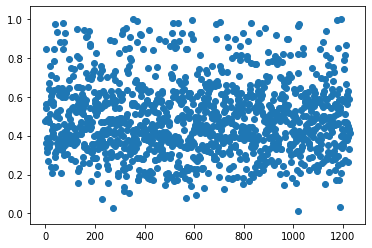

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

x_range = range(0,1228)
#plt.scatter(actuals, predictions)
g=plt.scatter(x_range, actuals)


#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
#g.axes.set_xlabel('True Values ')
#g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

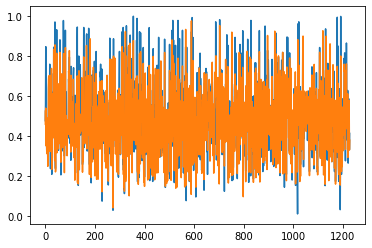

In [24]:
fig, ax = plt.subplots()
ax.plot(x_range,actuals)
ax.plot(x_range,predictions)


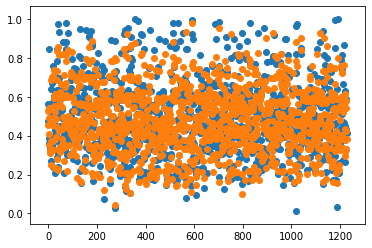

In [25]:
fig, ax = plt.subplots()
ax.scatter(x_range,actuals)
ax.scatter(x_range,predictions)


In [ ]:
#r2 and mse

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f’Mean squared error: {mse.round(3)} \nr2: {r2.round(3)}’)